In [1]:
import pyforest

In [2]:
alcohol = pd.read_csv('Alcohol_Sales.csv')

<IPython.core.display.Javascript object>

In [3]:
alcohol.isnull().sum()

DATE              0
S4248SM144NCEN    0
dtype: int64

In [7]:
alcohol.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [8]:
alcohol.DATE = pd.to_datetime(alcohol.DATE,     infer_datetime_format = True)

<IPython.core.display.Javascript object>

In [9]:
alcohol.rename(columns= {alcohol.columns[1] : 'Sales'} , inplace = True)

In [11]:
alcohol = alcohol.set_index(['DATE'])

In [12]:
alcohol

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

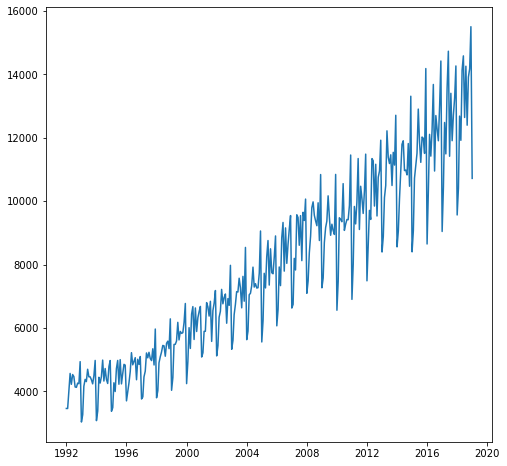

In [14]:
plt.figure(figsize = (8,8))
plt.plot(alcohol)

<IPython.core.display.Javascript object>

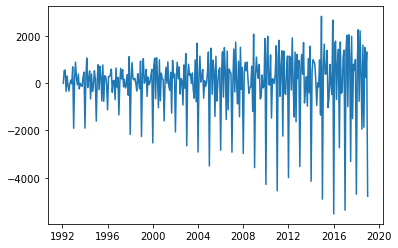

In [15]:
plt.plot(alcohol.diff())

In [24]:
alcohol_log = np.log(alcohol)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

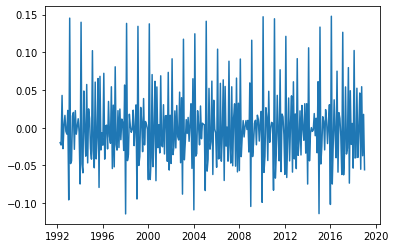

In [25]:
plt.plot(alcohol_log.diff().diff().diff())

# Train Test

In [26]:
train = alcohol.iloc[:300,]
test  = alcohol.iloc[300:,]

In [28]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

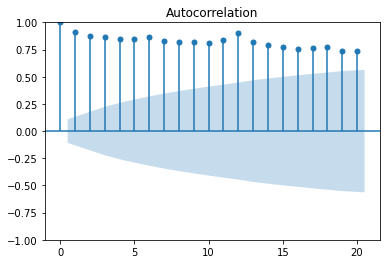

In [29]:
plot_acf(alcohol.Sales, lags= 20); # No Information because slow decrease.

C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


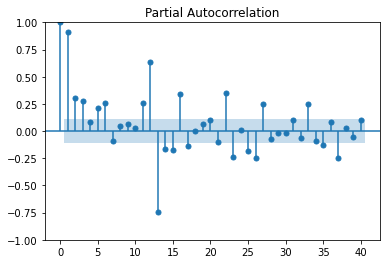

In [31]:
plot_pacf(alcohol.Sales, lags=40); 

In [27]:
import pmdarima
from pmdarima import auto_arima
auto_arima(alcohol['Sales'], seasonal = True, m=12)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(2, 0, 2, 12),
      suppress_warnings=True)

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['Sales'], order=(3, 1, 1),seasonal_order=(2, 0, 2, 12))
result = model.fit();

C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
pred_alcohol = result.predict(start = 300 , end = 326)

In [34]:
pred_alcohol

2017-01-01    9.116553
2017-02-01    9.273684
2017-03-01    9.390943
2017-04-01    9.389300
2017-05-01    9.507248
2017-06-01    9.528910
2017-07-01    9.423413
2017-08-01    9.487668
2017-09-01    9.426441
2017-10-01    9.475490
2017-11-01    9.477738
2017-12-01    9.609043
2018-01-01    9.186791
2018-02-01    9.286536
2018-03-01    9.434464
2018-04-01    9.441974
2018-05-01    9.532795
2018-06-01    9.576765
2018-07-01    9.472991
2018-08-01    9.521488
2018-09-01    9.474565
2018-10-01    9.518024
2018-11-01    9.514773
2018-12-01    9.654062
2019-01-01    9.227041
2019-02-01    9.329286
2019-03-01    9.480193
Freq: MS, Name: predicted_mean, dtype: float64